# Теоретические основы многослойных персептронов (МСП)

#1. Историческое развитие и концептуальные основы
##1.1. Происхождение и эволюция: от персептрона к глубокому обучению
Многослойный персептрон (МСП, англ. Multilayer Perceptron, MLP) является одним из классических и наиболее фундаментальных типов нейронных сетей прямого распространения (feedforward neural networks). Его история тесно связана с развитием искусственного интеллекта и машинного обучения.
* Персептрон Розенблатта (1957-1958): Фрэнк Розенблатт представил модель персептрона – простейшую нейронную сеть, способную к обучению для решения задач бинарной классификации линейно разделимых данных. Он состоял из одного слоя обучаемых нейронов.
* Ограничения персептрона и "AI зима": В 1969 году Марвин Минский и Сеймур Пейперт в своей книге "Персептроны" математически доказали, что однослойный персептрон не способен решать задачи, которые не являются линейно разделимыми (например, классическая задача XOR - "исключающее ИЛИ"). Это открытие, наряду с другими факторами, привело к снижению интереса и финансирования исследований в области нейронных сетей, периоду, известному как "первая AI зима".
* Возрождение и многослойные архитектуры: Идея преодоления ограничений однослойного персептрона путем добавления одного или нескольких скрытых слоев нейронов существовала, но ключевой проблемой было отсутствие эффективного алгоритма обучения таких многослойных структур.
* Алгоритм обратного распространения ошибки (Backpropagation): Прорыв произошел в 1970-х и 1980-х годах с (пере)открытием и популяризацией алгоритма обратного распространения ошибки (Rumelhart, Hinton, Williams, 1986; хотя сама идея была предложена ранее Вербосом в 1974 и другими). Этот алгоритм позволил эффективно обучать веса в многослойных сетях, что и привело к появлению МСП в их современном понимании.
* Основа для глубокого обучения: Многослойные персептроны стали фундаментом для развития более сложных архитектур глубокого обучения. Понимание их принципов работы является ключом к пониманию современных сверточных (CNN) и рекуррентных (RNN) нейронных сетей.


##1.2. Математические основы: Универсальная теорема аппроксимации
Теоретическая мощь МСП во многом обосновывается Универсальной теоремой аппроксимации. Существуют различные формулировки этой теоремы (Cybenko, 1989; Hornik, Stinchcombe, White, 1989). В общем виде она утверждает, что многослойный персептрон с одним скрытым слоем, содержащим достаточное количество нейронов с нелинейной функцией активации (например, сигмоидной), способен аппроксимировать любую непрерывную функцию на компактом подмножестве ℝⁿ с любой заданной точностью.
* Это означает, что многослойные персептроны теоретически могут моделировать сколь угодно сложные зависимости в данных.
* Важно отметить, что теорема говорит о существовании такой сети, но не указывает, как найти ее параметры (веса и смещения) или сколько именно нейронов потребуется на практике.


##1.3. Основная архитектура МСП
Многослойный персептрон состоит как минимум из трех типов слоев:
* Входной слой (Input Layer): Принимает входные данные (признаки). Количество нейронов в этом слое соответствует размерности входного вектора. Нейроны этого слоя обычно не выполняют вычислений, а лишь передают значения дальше.
* Скрытые слои (Hidden Layers): Один или несколько слоев, расположенных между входным и выходным слоями. Именно здесь происходят основные вычисления и преобразования данных. Нейроны скрытых слоев используют нелинейные функции активации, что позволяет сети изучать сложные нелинейные зависимости. Наличие хотя бы одного скрытого слоя делает персептрон многослойным.
* Выходной слой (Output Layer): Формирует выход сети. Количество нейронов и тип функции активации в этом слое зависят от решаемой задачи (например, один нейрон с сигмоидной функцией для бинарной классификации, N нейронов с Softmax для многоклассовой классификации, один нейрон с линейной функцией для регрессии).

Структура нейрона:
Каждый нейрон (кроме нейронов входного слоя) вычисляет взвешенную сумму своих входов, добавляет к ней член смещения (bias) и пропускает результат через функцию активации:
`a = f(∑(w_i * x_i) + b)`
где:
*   `a` – выход нейрона (активация)
*   `f(·)` – функция активации
*   `w_i` – веса, связывающие i-й вход с данным нейроном
*   `x_i` – значения i-го входа
*   `b` – смещение (bias) нейрона

Сигнал в МСП распространяется строго в одном направлении – от входного слоя через скрытые слои к выходному (прямое распространение). В сети отсутствуют обратные связи (в отличие от рекуррентных сетей).
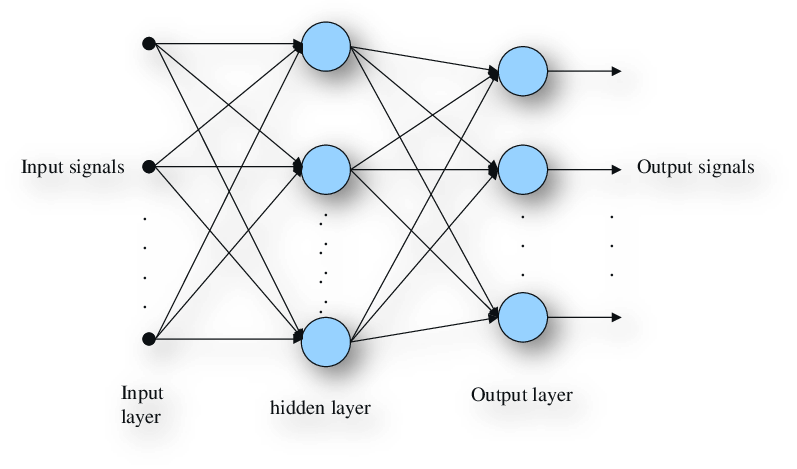


##1.4. Функции активации
Функции активации вводят нелинейность в модель, что позволяет многослойному персептрону изучать сложные закономерности. Без нелинейных функций активации МСП, независимо от количества слоев, был бы эквивалентен линейной модели.

Основные типы функций активации:

#####Сигмоида (Sigmoid / Logistic): σ(z) = 1 / (1 + exp(-z))
* Диапазон значений: (0, 1).
* Исторически популярна, но имеет проблему затухания градиентов при больших |z|, что замедляет обучение глубоких сетей.

#####Гиперболический тангенс (Tanh): tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))
* Диапазон значений: (-1, 1).
* Схож с сигмоидой, но симметричен относительно нуля, что иногда ускоряет сходимость. Также страдает от затухания градиентов.

#####ReLU (Rectified Linear Unit): ReLU(z) = max(0, z)
* Диапазон значений: [0, +∞).
* Наиболее популярная функция активации в современных глубоких сетях. Вычислительно эффективна, помогает бороться с затуханием градиентов для положительных значений.
* Проблема "мертвых ReLU": если нейрон перестает активироваться (z < 0 для всех входов), он перестает обновлять свои веса.

Вариации ReLU:
#####Leaky ReLU: LeakyReLU(z) = z if z > 0 else αz (где α – малый коэффициент, например, 0.01). Предотвращает "мертвые ReLU".
#####ELU (Exponential Linear Unit): Схожа с Leaky ReLU, но использует экспоненту для отрицательных значений.
#####Softmax: Softmax(z_i) = exp(z_i) / ∑(exp(z_j)) для всех j.
* Обычно используется в выходном слое для задач многоклассовой классификации. Преобразует вектор вещественных чисел в распределение вероятностей (сумма выходов равна 1).


#2. Процесс обучения МСП
Обучение многослойного персептрона — это процесс настройки его весов (w) и смещений (b) таким образом, чтобы минимизировать ошибку сети на обучающем наборе данных. Основным алгоритмом для этого является метод обратного распространения ошибки в сочетании с градиентным спуском.


##2.1. Прямое распространение (Forward Propagation)
На этом этапе входной вектор данных x пропускается через сеть от входного слоя к выходному. Для каждого нейрона вычисляется его активация на основе активаций нейронов предыдущего слоя, весов и смещений. Результатом является вектор предсказанных значений ŷ на выходном слое.


##2.2. Функция потерь (Loss Function)
Функция потерь L(y, ŷ) измеряет расхождение между истинными значениями y и предсказанными сетью значениями ŷ. Выбор функции потерь зависит от задачи:
* Среднеквадратичная ошибка (MSE - Mean Squared Error): Часто используется для задач регрессии.
L = (1/N) * ∑(y_i - ŷ_i)²
* Категориальная перекрестная энтропия (Categorical Cross-Entropy): Используется для задач многоклассовой классификации (с Softmax на выходе).
L = -∑(y_i * log(ŷ_i)) (для одного примера, где y_i – one-hot encoding истинной метки)
* Бинарная перекрестная энтропия (Binary Cross-Entropy): Для задач бинарной классификации (с сигмоидой на выходе).
L = -[y * log(ŷ) + (1-y) * log(1-ŷ)]


##2.3. Обратное распространение ошибки (Backpropagation)
Это ключевой этап, позволяющий вычислить градиенты функции потерь по всем весам и смещениям сети. Алгоритм работает следующим образом:
1. Вычисляется ошибка на выходном слое.
2. Эта ошибка распространяется в обратном направлении – от выходного слоя к входному.
3. На каждом слое вычисляются частные производные функции потерь по весам и смещениям этого слоя, используя цепное правило дифференцирования. Эти производные (градиенты) показывают, как нужно изменить параметры, чтобы уменьшить ошибку.


##2.4. Оптимизация весов (Градиентный спуск и его вариации)
После вычисления градиентов параметры сети обновляются с использованием одного из методов градиентного спуска.
* Пакетный градиентный спуск (Batch Gradient Descent): Градиенты вычисляются по всему обучающему набору, затем обновляются веса. Медленно для больших наборов данных.
* Стохастический градиентный спуск (SGD - Stochastic Gradient Descent): Веса обновляются после обработки каждого отдельного примера. Быстрее, но обновления "шумные".
* Мини-пакетный градиентный спуск (Mini-batch Gradient Descent): Компромисс между двумя предыдущими. Градиенты вычисляются и веса обновляются по небольшим подмножествам (мини-батчам) данных. Наиболее распространенный подход.

Оптимизаторы с адаптивной скоростью обучения:
* Momentum: Добавляет долю предыдущего обновления к текущему, помогая преодолевать локальные минимумы и ускоряя сходимость.
* AdaGrad (Adaptive Gradient): Адаптирует скорость обучения для каждого параметра индивидуально.
* RMSProp (Root Mean Square Propagation): Модификация AdaGrad для борьбы с проблемой быстрого уменьшения скорости обучения.
* Adam (Adaptive Moment Estimation): Сочетает идеи Momentum и RMSProp. Часто является выбором по умолчанию благодаря хорошей производительности на широком круге задач.


##2.5. Регуляризация для борьбы с переобучением
Переобучение (overfitting) возникает, когда модель слишком хорошо подстраивается под обучающие данные и плохо обобщается на новые, невиданные данные. Многослойные персептроны склонны к переобучению из-за большого количества параметров.
Методы регуляризации:
* L1 и L2 регуляризация (Weight Decay): Добавление штрафа к функции потерь, пропорционального сумме абсолютных значений весов (L1) или сумме квадратов весов (L2). L2-регуляризация стремится уменьшить величину весов, L1 может приводить к обнулению некоторых весов (разреживанию).
* Dropout: Во время обучения случайным образом "выключается" (обнуляется выход) часть нейронов в скрытых слоях с некоторой вероятностью. Это заставляет сеть учить более робастные признаки, не полагаясь на отдельные нейроны.
* Ранняя остановка (Early Stopping): Обучение прекращается, когда производительность на отдельном валидационном наборе данных перестает улучшаться или начинает ухудшаться, даже если ошибка на обучающем наборе продолжает падать.


#3. МСП в сравнении с другими архитектурами
##3.1. Сравнение с радиально-базисными сетями (РБНС)
Радиально-базисные нейронные сети (РБНС, англ. Radial Basis Function Networks, RBFN) представляют собой класс нейронных сетей, которые используют радиально-базисные функции в качестве функций активации в скрытом слое. Основная идея РБНС заключается в том, что отклик нейрона скрытого слоя максимален, когда входной вектор близок к "центру" этого нейрона, и уменьшается по мере удаления от него. Это позволяет РБНС эффективно выполнять локальную аппроксимацию и интерполяцию функций.

| Характеристика          | Многослойный персептрон (МСП)                               | Радиально-базисная сеть (РБНС)                        |
| :---------------------- | :---------------------------------------------------------- | :---------------------------------------------------- |
| **Функции активации**   | Глобальные, нелинейные (сигмоида, ReLU, tanh), зависят от взвешенной суммы входов. | Локальные, радиальные (гауссова, мультиквадратичная), зависят от расстояния до центра. |
| **Аппроксимация**       | Глобальная аппроксимация функции всей областью входных данных. | Локальная аппроксимация, где каждый нейрон скрытого слоя "отвечает" за определенную область пространства. |
| **Скрытые слои**        | Обычно один или несколько, могут быть глубокими для иерархического извлечения признаков. | Обычно один скрытый слой, нейроны которого представляют прототипы или центры кластеров. |
| **Обучение**            | Сквозное, методом обратного распространения ошибки для всех слоев. | Часто двухэтапное: 1) определение центров и ширин РБФ (часто методами без учителя), 2) обучение весов выходного слоя (часто линейным методом). |
| **Чувствительность**    | К масштабу входных данных, требует нормализации.             | К выбору центров и их ширин, что критично для производительности. |
| **Интерпретируемость**  | Обычно ниже ("черный ящик"), особенно в глубоких сетях.       | Потенциально выше, так как центры РБФ могут быть интерпретированы как характерные точки данных. |
| **Скорость обучения**   | Может быть медленнее, особенно для глубоких сетей, из-за итеративной природы обратного распространения. | Часто быстрее, особенно при двухэтапном обучении, где вторая фаза может иметь аналитическое решение. |
| **Локальные минимумы**  | Более подвержены, хотя современные оптимизаторы и инициализации помогают. | Менее подвержены при двухэтапном обучении, так как оптимизация выходных весов является выпуклой задачей при фиксированных центрах. |

Ключевое концептуальное различие между МСП и РБНС заключается в их подходе к аппроксимации функций и разделению пространства признаков. МСП строят сложные границы решений путем иерархического преобразования входных данных через слои нейронов с глобальными функциями активации. Каждый нейрон вносит вклад в глобальное отображение. В отличие от этого, РБНС используют локальный подход: нейроны скрытого слоя с радиально-базисными функциями активации реагируют на входные данные, находящиеся в окрестности их "центра". Таким образом, РБНС делят пространство на локальные области, и выход сети формируется как взвешенная комбинация откликов этих локальных "экспертов". Это часто приводит к более быстрой сходимости РБНС и лучшей интерпретируемости скрытого слоя, но может потребовать большего числа нейронов для аппроксимации сложных функций в многомерных пространствах по сравнению с глубокими МСП.

##3.2.Сравнение с сетями Колмогорова-Арнольда (KAN)
Сети Колмогорова-Арнольда (Kolmogorov-Arnold Networks, KAN) представляют собой недавний (Liu et al., 2024) и перспективный класс нейронных сетей, вдохновленный теоремой представления Колмогорова-Арнольда. Эта теорема утверждает, что любая многомерная непрерывная функция может быть представлена как суперпозиция одномерных непрерывных функций.

| Характеристика              | Многослойный персептрон (МСП)                                      | Сети Колмогорова-Арнольда (KAN)                                                                 |
| :-------------------------- | :----------------------------------------------------------------- | :--------------------------------------------------------------------------------------------- |
| **Основной принцип**        | Взвешенная сумма входов, пропущенная через фиксированную нелинейность на нейроне (узле). | Суперпозиция обучаемых одномерных функций, расположенных на "ребрах" (связях) сети. Узлы выполняют простое суммирование. |
| **Функции активации**       | Фиксированные нелинейные функции (например, ReLU, Sigmoid, Tanh), применяются к выходу нейрона. | Обучаемые одномерные функции (часто реализованные через сплайны) на каждом ребре. Нелинейность сосредоточена на связях, а не на узлах. |
| **Расположение нелинейности**| На нейронах (узлах).                                               | На весах (ребрах/связях).                                                                      |
| **Параметры**               | Обучаются веса (числовые значения) и смещения (bias) нейронов.       | Обучаются параметры одномерных функций на ребрах (например, коэффициенты базисных сплайнов). |
| **Интерпретируемость**      | Обычно низкая, особенно для глубоких сетей ("черный ящик").          | Потенциально выше, так как можно визуализировать и анализировать выученные одномерные функции на каждом ребре. |
| **Эффективность параметров**| Могут требовать большого количества параметров для аппроксимации сложных функций. | Заявляется, что могут достигать высокой точности с меньшим количеством параметров для определенных классов функций, особенно с выраженной композиционной структурой. |
| **Вычислительная сложность**| Относительно простая операция (скалярное произведение и применение функции активации) на нейрон. | Вычисление и обучение сплайнов (или других параметрических функций) на каждом ребре может быть более вычислительно затратным на этапе прямого и обратного прохода. |
| **Универсальная аппроксимация**| Да, согласно теореме универсальной аппроксимации для MLP.          | Да, по построению следуют теореме представления Колмогорова-Арнольда, гарантирующей универсальность. |
| **Масштабируемость**        | Хорошо масштабируются и широко используются в глубоких архитектурах. | Масштабируемость на очень большие и глубокие сети, а также эффективность обучения являются активной областью исследований. |
| **Теоретическая основа**    | Теорема универсальной аппроксимации (например, Цибенко, Хорника).   | Теорема представления Колмогорова-Арнольда.                                                  |

Ключевое отличие KAN от МСП заключается в том, что МСП используют линейные преобразования, которые чередуются с применением фиксированных нелинейных функций активации, тогда как KAN пытаются выучить сами нелинейные функции на ребрах сети. Это может дать KAN преимущество в точности и эффективности использования параметров на задачах, хорошо описываемых композициями одномерных функций. Однако, они также могут быть более сложными в обучении и настройке по сравнению с хорошо изученными многослойными персептронами.


##3.3. Сравнение с линейными моделями
* Линейные модели (например, линейная или логистическая регрессия) могут рассматриваться как частный случай многослойного персептрона без скрытых слоев (или с линейной функцией активации).
* Многослойные персептроны способны моделировать сложные нелинейные зависимости, в то время как линейные модели ограничены линейными границами решений или линейными отношениями.
* Линейные модели более интерпретируемы и требуют меньше данных для обучения.


##3.3. Место МСП в глубоком обучении
* Многослойные персептроны являются основополагающими блоками для многих более сложных архитектур глубокого обучения.
* Сверточные нейронные сети (CNN): Используют сверточные слои для извлечения иерархических признаков (например, в изображениях), но часто завершаются одним или несколькими полносвязными слоями (которые по сути являются МСП) для классификации или регрессии.
* Рекуррентные нейронные сети (RNN): Предназначены для обработки последовательных данных, но отдельные элементы внутри RNN (например, вычисление скрытого состояния) используют принципы, схожие с МСП.


#4. Практические применения
Многослойные персептроны, благодаря своей универсальности, находят применение в широком спектре задач:

Классификация: Распознавание образов (например, рукописных цифр на датасете MNIST), кредитный скоринг, диагностика заболеваний, спам-фильтры.

Регрессия: Прогнозирование временных рядов (цены акций, погодные условия), оценка стоимости недвижимости, предсказание спроса.

Обработка естественного языка (NLP): Хотя для сложных NLP задач сейчас доминируют трансформеры и RNN, МСП могут использоваться для более простых задач, таких как классификация текстов или как компоненты в более крупных моделях.

Обнаружение аномалий: Выявление необычных или подозрительных паттернов в данных.


#5. Сильные стороны и ограничения
##5.1. Сильные стороны
* Универсальность: Способность аппроксимировать любую непрерывную функцию (согласно теореме универсальной аппроксимации).
* Гибкость: Возможность построения сетей различной глубины и ширины для решения задач разной сложности.
* Не требуют априорных знаний о структуре данных: МСП способны самостоятельно извлекать признаки и зависимости из данных (хотя предварительная обработка данных важна).
* Хорошо изучены: Существует обширная теоретическая база и множество практических рекомендаций по их построению и обучению.


##5.2. Ограничения
* Склонность к переобучению: Особенно при большом количестве параметров и недостаточном объеме данных. Требуют применения техник регуляризации.
* Проблема исчезающих/взрывающихся градиентов: В глубоких сетях градиенты могут становиться слишком малыми (исчезающие) или слишком большими (взрывающиеся) при распространении через множество слоев, что затрудняет обучение. ReLU и его вариации, а также техники инициализации весов (например, Xavier, He) помогают смягчить эту проблему.
* Вычислительная сложность: Обучение глубоких многослойных персептронов на больших наборах данных может быть ресурсоемким и требовать значительного времени и вычислительных мощностей (GPU).
* Чувствительность к масштабированию признаков: МСП чувствительны к масштабу входных данных, поэтому обычно требуется их нормализация или стандартизация.
* "Черный ящик": Интерпретация того, как именно многослойный персептрон принимает решения, может быть сложной, особенно для глубоких сетей.
* Неэффективность для некоторых типов данных: МСП не учитывают пространственную структуру данных (как CNN для изображений) или временную последовательность (как RNN для текста или временных рядов) напрямую, если не используются специальные подходы к формированию признаков.


#6. Современные тенденции и будущие направления
Хотя "классические" МСП могут показаться вытесненными более специализированными глубокими архитектурами, они продолжают играть важную роль:
* Компоненты глубоких сетей: Полносвязные слои (МСП) остаются неотъемлемой частью многих современных архитектур (например, в классификационных "головах" CNN).
* Табличные данные: Для задач на табличных данных многослойные персептроны и их вариации (например, с использованием техник вроде Entity Embeddings для категориальных признаков) часто показывают конкурентоспособные результаты, иногда превосходя древовидные модели (например, градиентный бустинг).
* Улучшенные методы обучения и архитектуры: Исследования продолжаются в области новых функций активации, оптимизаторов, методов регуляризации и техник инициализации весов, которые улучшают обучение и производительность МСП.
* Автоматическое машинное обучение (AutoML): Разрабатываются подходы для автоматического подбора архитектуры многослойного персептрона (количество слоев, нейронов, функции активации) для конкретной задачи.
* Интерпретируемость: Активно развиваются методы для повышения интерпретируемости МСП (например, LIME, SHAP), чтобы лучше понимать их внутреннюю работу.


#Заключение
Многослойные персептроны, несмотря на свою относительную простоту по сравнению с некоторыми современными сложными и узкоспециализированными архитектурами, остаются краеугольным камнем в теории и практике нейронных сетей. Они заложили основу для революции в области глубокого обучения, и понимание их принципов работы, сильных и слабых сторон необходимо для любого специалиста в области машинного обучения. Их способность к аппроксимации сложных нелинейных функций делает их мощным инструментом для широкого круга задач, а продолжающиеся исследования, направленные на улучшение их эффективности, интерпретируемости и интеграции с новыми парадигмами, такими как сети Колмогорова-Арнольда, обеспечивают их актуальность и развитие в постоянно меняющемся ландшафте искусственного интеллекта.


#Список литературы
1. Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological Review, 65(6), 386–408.

2. Minsky, M., & Papert, S. (1969). Perceptrons: An Introduction to Computational Geometry. MIT Press.

3. Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). Learning internal representations by error propagation. In Parallel distributed processing: Explorations in the microstructure of cognition, vol. 1: Foundations (pp. 318–362). MIT Press.

4. Cybenko, G. (1989). Approximation by superpositions of a sigmoidal function. Mathematics of Control, Signals, and Systems, 2(4), 303–314.

5. Hornik, K., Stinchcombe, M., & White, H. (1989). Multilayer feedforward networks are universal approximators. Neural Networks, 2(5), 359–366.

6. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.

7. Nielsen, M. A. (2015). Neural Networks and Deep Learning. Determination Press.

8. Haykin, S. (2009). Neural Networks and Learning Machines (3rd ed.). Pearson.

9. Liu, Z., Wang, Y., Vaidya, S., Du, F., Halperi, I., Hou, S., ... & Tegmark, M. (2024). KAN: Kolmogorov-Arnold Networks.

#Реализация MLP и демонстрация экспериментов

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_regression
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class MLPNetwork(nn.Module):
    def __init__(self, input_size=1, hidden_layer_sizes=[10], output_size=1,
                 activation_function='relu', learning_rate=0.01,
                 max_epochs=100, animation_interval=5, problem_type='regression', l2_lambda=0.0):
        super(MLPNetwork, self).__init__()
        self.hidden_layer_sizes = hidden_layer_sizes
        self.activation_function_name = activation_function
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.animation_interval = animation_interval
        self.training_history = []
        self.problem_type = problem_type
        self.l2_lambda = l2_lambda # Коэффициент L2 регуляризации

        # Инициализируем список слоёв
        layers = []
        current_size = input_size
        for hidden_size in hidden_layer_sizes:
            layers.append(nn.Linear(current_size, hidden_size)) # линейный слой
            if activation_function == 'relu':
                layers.append(nn.ReLU())
            elif activation_function == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation_function == 'tanh':
                layers.append(nn.Tanh())
            current_size = hidden_size

        layers.append(nn.Linear(current_size, output_size)) # выходной слой

        if self.problem_type == 'classification':
             layers.append(nn.Sigmoid()) # Для бинарной классификации, чтобы выход был в [0, 1]

        self.network = nn.Sequential(*layers) # объединяем слои в последовательную модель
        self.scaler = StandardScaler()

    def forward(self, x):
        return self.network(x)

    def fit(self, X_np, y_np, animate=False):
        # Масштабирование входных данных
        X_scaled_np = self.scaler.fit_transform(X_np)
        X = torch.FloatTensor(X_scaled_np)
        y = torch.FloatTensor(y_np)

        if self.problem_type == 'regression':
            criterion = nn.MSELoss()
        elif self.problem_type == 'classification':
            criterion = nn.BCELoss() # Binary Cross Entropy для бинарной классификации
        else:
            raise ValueError("Неизвестный тип задачи. Используйте 'regression' или 'classification'.")

        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        if animate:
            self.training_history = []
            # Сохраняем активации скрытых слоёв для визуализации
            with torch.no_grad():
                y_pred_initial = self(X)
                initial_loss = criterion(y_pred_initial, y).item()
                if self.l2_lambda > 0:
                    l2_reg = sum(p.pow(2.0).sum() for p in self.parameters())
                    initial_loss += self.l2_lambda * l2_reg.item() / 2
                self.training_history.append({
                    'epoch': 0,
                    'weights': [p.clone().detach().numpy() for p in self.parameters()],
                    'loss': initial_loss
                })


        for epoch in range(1, self.max_epochs + 1):
            optimizer.zero_grad()
            outputs = self(X)
            loss = criterion(outputs, y)

            # L2 регуляризация
            if self.l2_lambda > 0:
                l2_reg = torch.tensor(0.)
                for param in self.parameters():
                    l2_reg += torch.norm(param, p=2).pow(2)
                loss += self.l2_lambda * l2_reg / 2 # Делим на 2 для соответствия стандартной формуле

            loss.backward()
            optimizer.step()

            if animate and epoch % self.animation_interval == 0:
                self.training_history.append({
                    'epoch': epoch,
                    'weights': [p.clone().detach().numpy() for p in self.parameters()], # Сохраняем копии весов
                    'loss': loss.item()
                })

        # Конечное состояние для анимации
        if animate and (self.max_epochs % self.animation_interval != 0 or not self.training_history or self.training_history[-1]['epoch'] != self.max_epochs) :
             with torch.no_grad():
                y_pred_final = self(X)
                final_loss = criterion(y_pred_final, y).item()
                if self.l2_lambda > 0:
                    l2_reg = sum(p.pow(2.0).sum() for p in self.parameters())
                    final_loss += self.l2_lambda * l2_reg.item() / 2
                self.training_history.append({
                    'epoch': self.max_epochs,
                    'weights': [p.clone().detach().numpy() for p in self.parameters()],
                    'loss': final_loss
                })
        return self

    def predict(self, X_np):
        X_scaled_np = self.scaler.transform(X_np) # Используем transform, а не fit_transform
        X = torch.FloatTensor(X_scaled_np)
        self.eval() # Переводим модель в режим оценки
        with torch.no_grad():
            predictions = self(X)
        self.train() # Возвращаем в режим обучения, если нужно
        return predictions

    def calculate_metrics(self, y_true_np, y_pred_np):
        """
        Вычисляет различные метрики качества.
        y_true_np и y_pred_np должны быть numpy-массивами.
        """
        y_true = y_true_np.flatten()
        y_pred = y_pred_np.flatten()

        metrics = {}
        if self.problem_type == 'regression':
            metrics['MSE'] = mean_squared_error(y_true, y_pred)
            metrics['RMSE'] = np.sqrt(metrics['MSE'])
            metrics['MAE'] = mean_absolute_error(y_true, y_pred)
            metrics['R2'] = r2_score(y_true, y_pred)
            y_range = np.max(y_true) - np.min(y_true)
            metrics['NRMSE'] = metrics['RMSE'] / y_range if y_range != 0 else np.inf
            non_zero_true = y_true[y_true != 0]
            non_zero_pred = y_pred[y_true != 0]
            if len(non_zero_true) > 0:
                metrics['MAPE (%)'] = np.mean(np.abs((non_zero_true - non_zero_pred) / non_zero_true)) * 100
                metrics['MdAPE (%)'] = np.median(np.abs((non_zero_true - non_zero_pred) / non_zero_true)) * 100
            else:
                metrics['MAPE (%)'] = np.inf
                metrics['MdAPE (%)'] = np.inf
            metrics['Max Error'] = np.max(np.abs(y_true - y_pred))
        elif self.problem_type == 'classification':
            # Для классификации предполагаем бинарную задачу и порог 0.5
            y_pred_class = (y_pred >= 0.5).astype(int)
            metrics['Accuracy'] = accuracy_score(y_true, y_pred_class)
            # Можно добавить другие метрики классификации: precision, recall, f1-score
        return metrics

    def visualize_activations(self, X_np_sample):
        """
        Визуализирует активации нейронов скрытых слоев для одного образца X_np_sample.
        X_np_sample должен быть 1D numpy-массивом или 2D с одной строкой.
        """
        if X_np_sample.ndim == 1:
            X_np_sample = X_np_sample.reshape(1, -1)

        X_scaled_np = self.scaler.transform(X_np_sample)
        x_tensor = torch.FloatTensor(X_scaled_np)
        self.eval()

        activations_history = []
        current_input = x_tensor
        for i, layer in enumerate(self.network):
            current_input = layer(current_input)
            if isinstance(layer, (nn.ReLU, nn.Sigmoid, nn.Tanh)): # Сохраняем активации после функции активации
                activations_history.append(current_input.detach().numpy().flatten())

        n_layers = len(activations_history)
        if n_layers == 0:
            print("Нет скрытых слоев с функциями активации для визуализации.")
            return

        fig, axes = plt.subplots(n_layers, 1, figsize=(10, 2.5 * n_layers))
        if n_layers == 1:
            axes = [axes]

        for i, activations in enumerate(activations_history):
            ax = axes[i]
            ax.bar(range(len(activations)), activations, color='teal')
            ax.set_title(f'Активации скрытого слоя {i+1} ({self.activation_function_name})', fontsize=12)
            ax.set_ylabel('Значение активации', fontsize=10)
            ax.set_xlabel('Номер нейрона', fontsize=10)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.set_xticks(range(len(activations))) # Убедимся, что все нейроны показаны

        plt.tight_layout()
        plt.show()


    def animate_training(self, X_np, y_np, interval=200, problem_type='regression'):
        if not self.training_history:
            print("Нет истории обучения. Запустите fit с параметром animate=True.")
            return None

        fig, ax = plt.subplots(figsize=(10, 6))
        X_scaled_np = self.scaler.transform(X_np) # Используем transform, т.к. scaler уже обучен
        X_tensor = torch.FloatTensor(X_scaled_np)


        if X_np.shape[1] == 1 and problem_type == 'regression':
            # Анимация регрессии (1D)
            scatter = ax.scatter(X_np, y_np, alpha=0.6, label='Обучающие точки', color='blue')
            line, = ax.plot([], [], 'r-', label='Предсказание MLP', linewidth=2)
            ax.set_xlim(X_np.min() - 0.5, X_np.max() + 0.5)
            ax.set_ylim(y_np.min() - 0.5, y_np.max() + 0.5)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            X_smooth_np = np.linspace(X_np.min(), X_np.max(), 200).reshape(-1, 1)
            X_smooth_scaled_np = self.scaler.transform(X_smooth_np)
            X_smooth_tensor = torch.FloatTensor(X_smooth_scaled_np)
        elif X_np.shape[1] == 2 and problem_type == 'classification':
            # Анимация классификации (2D)
            ax.scatter(X_np[:, 0], X_np[:, 1], c=y_np.ravel(), cmap='coolwarm', edgecolors='k', alpha=0.7)
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                                 np.linspace(ylim[0], ylim[1], 100))
            Z_np = np.c_[xx.ravel(), yy.ravel()]
            Z_scaled_np = self.scaler.transform(Z_np)
            Z_tensor = torch.FloatTensor(Z_scaled_np)
            contour = ax.contour(xx, yy, np.zeros_like(xx), levels=[0.5], colors='k', linestyles='--') # Placeholder
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
        else:
            print("Анимация доступна только для 1D регрессии или 2D классификации.")
            return None


        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.set_title(f'Обучение MLP (Активация: {self.activation_function_name})', fontsize=14)
        epoch_text = ax.text(0.02, 0.95, '', transform=ax.transAxes,
                               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

        temp_model = MLPNetwork(input_size=self.network[0].in_features,
                                hidden_layer_sizes=self.hidden_layer_sizes,
                                output_size=self.network[-1].out_features,
                                activation_function=self.activation_function_name,
                                problem_type=self.problem_type)
        temp_model.scaler = self.scaler # Копируем обученный скейлер


        def update(frame_index):
            nonlocal contour # Для обновления контура в случае классификации
            if frame_index >= len(self.training_history):
                return (line, epoch_text) if problem_type == 'regression' else (contour, epoch_text)

            frame_data = self.training_history[frame_index]
            epoch = frame_data['epoch']
            loss_val = frame_data['loss']
            weights_and_biases = frame_data['weights']


            # Загружаем веса во временную модель
            with torch.no_grad():
                for param_idx, param in enumerate(temp_model.parameters()):
                    param.copy_(torch.FloatTensor(weights_and_biases[param_idx]))

            temp_model.eval()
            with torch.no_grad():
                if X_np.shape[1] == 1 and problem_type == 'regression':
                    y_pred_smooth = temp_model(X_smooth_tensor).detach().numpy()
                    line.set_data(X_smooth_np.flatten(), y_pred_smooth.flatten())
                elif X_np.shape[1] == 2 and problem_type == 'classification':
                    if contour: # Удаляем старый контур
                        for coll in contour.collections:
                            coll.remove()
                    Z_pred = temp_model(Z_tensor).detach().numpy().reshape(xx.shape)
                    contour = ax.contour(xx, yy, Z_pred, levels=[0.5], colors='k', linestyles='--')


            epoch_text.set_text(f'Эпоха: {epoch}, Loss: {loss_val:.6f}')
            return (line, epoch_text) if X_np.shape[1] == 1 and problem_type == 'regression' else (contour.collections[0] if contour else None, epoch_text)


        ani = FuncAnimation(fig, update, frames=len(self.training_history),
                            interval=interval, blit=False, repeat=True)
        plt.tight_layout()
        print(f"Создана анимация с {len(self.training_history)} кадрами")
        return ani


# Вспомогательные функции для генерации данных и визуализации
def generate_demo_data(n_samples=100, noise=0.1, func_type='sin', n_features=1):
    """
    Генерирует демонстрационные данные для MLP-сети.

    Параметры:
    - n_samples: количество точек данных
    - noise: уровень шума
    - func_type: тип функции ('sin', 'exp', 'quadratic', 'complex', '2d_regression', 'classification_moons', 'classification_circles')
    - n_features: количество признаков (для '2d_regression')

    Возвращает:
    - X: входные данные
    - y: целевые значения
    """
    if func_type == 'sin':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + noise * np.random.randn(n_samples)
    elif func_type == 'exp':
        X = np.linspace(-2, 2, n_samples).reshape(-1, 1)
        y = np.exp(-X.flatten()**2) + noise * np.random.randn(n_samples)
    elif func_type == 'quadratic':
        X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 - 1.5 * X.flatten() + 2 + noise * np.random.randn(n_samples)
    elif func_type == 'complex':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2) + noise * np.random.randn(n_samples)
    elif func_type == '2d_regression':
        X, y = make_regression(n_samples=n_samples, n_features=2, noise=noise*10, random_state=42)
        # Для простоты сделаем функцию более нелинейной
        y = np.sin(X[:,0]) * np.cos(X[:,1]) * 5 + noise * np.random.randn(n_samples)
    elif func_type == 'classification_moons':
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    elif func_type == 'classification_circles':
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    else:
        raise ValueError(f"Неизвестный тип функции: {func_type}")

    return X, y.reshape(-1, 1) if y.ndim == 1 else y


def generate_advanced_demo_data(n_samples=200, noise=0.1, func_type='multimodal'):
    """
    Генерирует более сложные демонстрационные данные.
    """
    if func_type == 'multimodal':
        X = np.linspace(-8, 8, n_samples).reshape(-1, 1)
        y = np.sin(X.flatten()) + 0.5 * np.sin(3 * X.flatten()) + noise * np.random.randn(n_samples)
    elif func_type == 'discontinuous':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = np.zeros(n_samples)
        mask1 = X.flatten() < -2
        mask2 = (X.flatten() >= -2) & (X.flatten() < 1)
        mask3 = X.flatten() >= 1
        y[mask1] = -1 + noise * np.random.randn(np.sum(mask1))
        y[mask2] = np.sin(X.flatten()[mask2] * 2) + noise * np.random.randn(np.sum(mask2))
        y[mask3] = 1 + 0.5 * np.sin(X.flatten()[mask3]) + noise * np.random.randn(np.sum(mask3))
    elif func_type == 'noisy_peaks':
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        base = np.sin(X.flatten()) * np.exp(-0.1 * X.flatten()**2)
        peaks = np.zeros(n_samples)
        for _ in range(10):
            pos = np.random.randint(0, n_samples)
            width = np.random.randint(5, 20)
            height = np.random.uniform(1, 3)
            start = max(0, pos - width // 2)
            end = min(n_samples, pos + width // 2)
            peaks[start:end] = height * np.exp(-0.5 * ((np.arange(start, end) - pos) / (width / 5))**2)
        y = base + peaks + noise * np.random.randn(n_samples)
    else: # default
        X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
        y = 0.5 * X.flatten()**2 + np.sin(X.flatten() * 3) + noise * np.random.randn(n_samples)
    return X, y.reshape(-1, 1)

def plot_dataset_results(X_train, y_train, X_test, y_test, model_for_predict, title="Результаты аппроксимации MLP", problem_type='regression'):
    """
    Визуализирует результаты аппроксимации для 1D и 2D данных.
    Принимает обученную модель для предсказаний.
    """
    plt.figure(figsize=(12, 8))

    y_train_pred_np = model_for_predict.predict(torch.FloatTensor(X_train)).detach().numpy()
    y_test_pred_np = model_for_predict.predict(torch.FloatTensor(X_test)).detach().numpy()

    if X_train.shape[1] == 1 and problem_type == 'regression': # 1D данные для регрессии
        train_sort_idx = np.argsort(X_train.flatten())
        test_sort_idx = np.argsort(X_test.flatten())
        plt.scatter(X_train, y_train, alpha=0.6, label='Обучающие данные', color='blue', s=30)
        plt.scatter(X_test, y_test, alpha=0.6, label='Тестовые данные', color='green', s=30)
        plt.plot(X_train[train_sort_idx], y_train_pred_np[train_sort_idx], 'r-', linewidth=2.5, label='Предсказания (обуч.)', alpha=0.8)
        plt.plot(X_test[test_sort_idx], y_test_pred_np[test_sort_idx], 'orange', linestyle='--', linewidth=2.5, label='Предсказания (тест)', alpha=0.8)
        plt.xlabel('X')
        plt.ylabel('Y')
    elif X_train.shape[1] == 2 and problem_type == 'regression': # 2D данные для регрессии
        fig = plt.figure(figsize=(15, 7)) # Создаем новую фигуру для 3D
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', alpha=0.5, label='Обучающие данные')
        ax1.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', alpha=0.5, label='Тестовые данные')
        ax1.set_title("Исходные данные")
        ax1.set_xlabel('X1')
        ax1.set_ylabel('X2')
        ax1.set_zlabel('Y')
        ax1.legend()

        ax2 = fig.add_subplot(122, projection='3d')
        x1_surf = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 20)
        x2_surf = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 20)
        X1_surf, X2_surf = np.meshgrid(x1_surf, x2_surf)
        X_surf_np = np.c_[X1_surf.ravel(), X2_surf.ravel()]
        X_surf_tensor = torch.FloatTensor(model_for_predict.scaler.transform(X_surf_np)) # Масштабируем данные для поверхности
        y_surf_pred_np = model_for_predict.predict(X_surf_tensor).detach().numpy().reshape(X1_surf.shape)

        ax2.plot_surface(X1_surf, X2_surf, y_surf_pred_np, cmap='viridis', alpha=0.7)
        ax2.scatter(X_test[:, 0], X_test[:, 1], y_test_pred_np, color='red', s=50, label='Предсказания (тест)')
        ax2.set_title("Предсказания MLP")
        ax2.set_xlabel('X1')
        ax2.set_ylabel('X2')
        ax2.set_zlabel('Y предсказанное')
        ax2.legend()
        plt.suptitle(title) # Используем suptitle для общего заголовка фигуры
        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Оставляем место для suptitle
        plt.show()
        return # Возвращаемся, чтобы не создавать лишний 2D график
    elif problem_type == 'classification': # 2D данные для классификации
        plt.scatter(X_train[:,0], X_train[:,1], c=y_train.ravel(), cmap='coolwarm', alpha=0.6, label='Обучающие данные', edgecolors='k')
        plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred_np.round().ravel(), cmap='coolwarm', marker='x', s=60, label='Предсказания (тест)', edgecolors='k')
        plt.xlabel('X1')
        plt.ylabel('X2')
        # Добавление границы решения
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                             np.linspace(ylim[0], ylim[1], 100))
        Z_np = np.c_[xx.ravel(), yy.ravel()]
        Z_tensor = torch.FloatTensor(model_for_predict.scaler.transform(Z_np))
        Z_pred = model_for_predict(Z_tensor).detach().numpy().reshape(xx.shape)
        plt.contour(xx, yy, Z_pred, levels=[0.5], colors='k', linestyles='--')


    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def visualize_metrics(metrics_dict, title="Метрики качества MLP"):
    fig, ax = plt.subplots(figsize=(12, 6))
    metrics = list(metrics_dict.keys())
    values = list(metrics_dict.values())
    bars = ax.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon', 'wheat', 'lightpink', 'lightseagreen'])

    for bar in bars:
        height = bar.get_height()
        if abs(height) < 1e-6 and height != 0:
            ax.text(bar.get_x() + bar.get_width()/2., 0.01, f'{height:.2e}', ha='center', va='bottom', rotation=45, fontsize=9)
        else:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02 * max(values) if height >= 0 else height - 0.05 * abs(max(values)),
                   f'{height:.4f}', ha='center', va='bottom', fontsize=9)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Значение метрики', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    return fig

In [3]:
def demo_mlp_approximation_1d():
    """
    Демонстрация аппроксимации 1D функции с помощью MLP.
    """
    print("ДЕМОНСТРАЦИЯ: Аппроксимация 1D функции MLP")
    print("=" * 60)
    print("Эта демонстрация показывает, как MLP аппроксимирует синусоидальную функцию.")
    print("Будут показаны исходные данные, предсказания сети и метрики качества.")

    # Генерация данных
    X_np, y_np = generate_demo_data(n_samples=100, noise=0.1, func_type='sin')
    X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.3, random_state=42)

    print(f"\n✓ Данные сгенерированы: {len(X_train_np)} для обучения, {len(X_test_np)} для теста.")
    print(f"✓ Диапазон X: [{X_np.min():.2f}, {X_np.max():.2f}], Y: [{y_np.min():.2f}, {y_np.max():.2f}]")

    # Создание и обучение MLP
    print("\nСоздаем и обучаем MLP...")
    mlp_model = MLPNetwork(input_size=1, hidden_layer_sizes=[20, 10], output_size=1,
                           activation_function='relu', learning_rate=0.01, max_epochs=1000, problem_type='regression')
    mlp_model.fit(X_train_np, y_train_np)
    print("✓ Обучение завершено!")

    # Предсказания
    y_train_pred_tensor = mlp_model.predict(X_train_np)
    y_test_pred_tensor = mlp_model.predict(X_test_np)
    y_train_pred_np = y_train_pred_tensor.detach().numpy()
    y_test_pred_np = y_test_pred_tensor.detach().numpy()


    # Метрики
    print("\nМЕТРИКИ КАЧЕСТВА НА ТЕСТОВОЙ ВЫБОРКЕ:")
    test_metrics = mlp_model.calculate_metrics(y_test_np, y_test_pred_np)
    for name, value in test_metrics.items():
        print(f"  • {name}: {value:.4f}")

    # Визуализация
    print("\nСтроим график аппроксимации...")
    plot_dataset_results(X_train_np, y_train_np, X_test_np, y_test_np, mlp_model,
                         title="Аппроксимация синусоиды с помощью MLP (ReLU)", problem_type='regression')
    visualize_metrics(test_metrics, title="Метрики MLP на тестовой выборке (1D регрессия)")

    print("\nВИЗУАЛИЗАЦИЯ АКТИВАЦИЙ СКРЫТЫХ СЛОЕВ (для первого тестового образца):")
    mlp_model.visualize_activations(X_test_np[0])


    print("\nОБРАЗОВАТЕЛЬНЫЕ ВЫВОДЫ:")
    print("  1. MLP с нелинейными функциями активации (ReLU) способен аппроксимировать сложные функции.")
    print("  2. Скрытые слои извлекают иерархические признаки из данных.")
    print("  3. Выходной слой комбинирует эти признаки для получения предсказания.")
    print("  4. Качество аппроксимации зависит от архитектуры сети (число слоев/нейронов) и процесса обучения.")
    print("=" * 60)

In [ ]:
def demo_mlp_classification_2d():
    """
    Демонстрация 2D классификации с помощью MLP.
    """
    print("ДЕМОНСТРАЦИЯ: 2D Классификация с помощью MLP (задача 'лун')")
    print("=" * 60)
    print("Эта демонстрация показывает, как MLP разделяет два нелинейно разделимых класса.")

    # Генерация данных "луны"
    X_np, y_np = generate_demo_data(n_samples=300, noise=0.2, func_type='classification_moons')
    X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.3, random_state=42)

    print(f"\n✓ Данные 'луны' сгенерированы: {len(X_train_np)} для обучения, {len(X_test_np)} для теста.")

    # Создание и обучение MLP
    print("\nСоздаем и обучаем MLP для классификации...")
    # Для бинарной классификации output_size=1 и sigmoid на выходе
    mlp_classifier = MLPNetwork(input_size=2, hidden_layer_sizes=[16, 8], output_size=1,
                                activation_function='tanh', learning_rate=0.01, max_epochs=1500, problem_type='classification')
    mlp_classifier.fit(X_train_np, y_train_np)
    print("✓ Обучение завершено!")

    # Предсказания (вероятности)
    y_train_pred_proba_np = mlp_classifier.predict(X_train_np).detach().numpy()
    y_test_pred_proba_np = mlp_classifier.predict(X_test_np).detach().numpy()

    # Метрики
    print("\nМЕТРИКИ КАЧЕСТВА НА ТЕСТОВОЙ ВЫБОРКЕ:")
    test_metrics = mlp_classifier.calculate_metrics(y_test_np, y_test_pred_proba_np) # передаем вероятности
    for name, value in test_metrics.items():
        print(f"  • {name}: {value:.4f}")

    # Визуализация
    print("\nСтроим график разделяющей поверхности...")
    plot_dataset_results(X_train_np, y_train_np, X_test_np, y_test_np, mlp_classifier,
                         title="Классификация 'лун' с помощью MLP (Tanh)", problem_type='classification')

    print("\nОБРАЗОВАТЕЛЬНЫЕ ВЫВОДЫ:")
    print("  1. MLP может строить сложные нелинейные разделяющие поверхности.")
    print("  2. Функция активации Tanh (или ReLU/Sigmoid) в скрытых слоях позволяет моделировать нелинейности.")
    print("  3. Выходной слой с Sigmoid дает вероятность принадлежности к классу (для бинарной классификации).")
    print("  4. График показывает, как MLP научился разделять два класса.")
    print("=" * 60)

In [18]:
def demo_mlp_training_process_interactive():
    """
    Интерактивная демонстрация процесса обучения MLP с выбором параметров.
    """
    print("=== ИНТЕРАКТИВНОЕ ОБУЧЕНИЕ MLP ===")
    print("Эта демонстрация позволяет настроить параметры MLP и наблюдать за процессом обучения на 1D функции.")

    # Выбор параметров пользователем
    print("\nНАСТРОЙКА ПАРАМЕТРОВ MLP:")
    print("-" * 40)

    # Ввод структуры скрытых слоев
    while True:
        try:
            hidden_layers_str = input("Введите размеры скрытых слоев через запятую (например, '20,10', по умолчанию '10'): ") or "10"
            hidden_layer_sizes = [int(s.strip()) for s in hidden_layers_str.split(',') if s.strip().isdigit()]
            if not hidden_layer_sizes:
                print("Некорректный ввод. Используется значение по умолчанию [10].")
                hidden_layer_sizes = [10]
            elif any(s <= 0 for s in hidden_layer_sizes):
                print("Размеры слоев должны быть положительными числами.")
                continue
            break
        except ValueError:
            print("Ошибка ввода. Пожалуйста, введите числа через запятую.")

    # Выбор функции активации
    activation_functions = ['relu', 'sigmoid', 'tanh']
    print("\nВыберите функцию активации:")
    for i, func_name in enumerate(activation_functions):
        print(f"{i+1}. {func_name.upper()}")
    while True:
        try:
            choice = int(input(f"Введите номер (1-{len(activation_functions)}, по умолчанию 1 - ReLU): ") or "1")
            if 1 <= choice <= len(activation_functions):
                activation_function = activation_functions[choice-1]
                break
            else:
                print(f"Выберите число от 1 до {len(activation_functions)}.")
        except ValueError:
            print("Введите число.")

    # Ввод скорости обучения
    while True:
        try:
            learning_rate = float(input("Введите скорость обучения (learning_rate, например, 0.01, по умолчанию 0.01): ") or "0.01")
            if learning_rate <= 0:
                print("Скорость обучения должна быть положительной.")
                continue
            break
        except ValueError:
            print("Введите число.")

    # Ввод количества эпох
    while True:
        try:
            max_epochs = int(input("Введите максимальное количество эпох (например, 1000, по умолчанию 500): ") or "500")
            if max_epochs < 1:
                print("Количество эпох должно быть больше 0.")
                continue
            break
        except ValueError:
            print("Введите целое число.")

    # Интервал отображения кадров в анимации
    while True:
        try:
            animation_interval = int(input("Введите интервал кадров анимации (например, 10, по умолчанию 20): ") or "20")
            if animation_interval < 1 or animation_interval > max_epochs:
                print(f"Интервал должен быть от 1 до {max_epochs}.")
                continue
            break
        except ValueError:
            print("Введите целое число.")

    # L2-регуляризация
    while True:
        try:
            l2_lambda = float(input("Введите коэффициент L2 регуляризации (например, 0.001, 0 для отключения, по умолчанию 0): ") or "0.0")
            if l2_lambda < 0:
                print("Коэффициент L2 не может быть отрицательным.")
                continue
            break
        except ValueError:
            print("Введите число.")

    # Выбор функции для аппроксимации
    print("\nВыберите функцию для аппроксимации:")
    func_types = ['sin', 'exp', 'quadratic', 'complex']
    for i, ft in enumerate(func_types):
        print(f"{i+1}. {ft.capitalize()}")
    while True:
        try:
            func_choice = int(input(f"Выберите функцию (1-{len(func_types)}, по умолчанию 1 - Sin): ") or "1")
            if 1 <= func_choice <= len(func_types):
                func_type = func_types[func_choice-1]
                break
            else:
                print(f"Выберите число от 1 до {len(func_types)}.")
        except ValueError:
            print("Введите число.")

    print("\n=" * 10)
    print(f"Выбранные параметры:")
    print(f"  - Скрытые слои: {hidden_layer_sizes}")
    print(f"  - Активация: {activation_function.upper()}")
    print(f"  - Скорость обучения: {learning_rate}")
    print(f"  - Эпохи: {max_epochs}")
    print(f"  - Интервал анимации: {animation_interval}")
    print(f"  - Функция: {func_type.capitalize()}")
    print(f"  - L2 лямбда: {l2_lambda}")
    print("=" * 50)

    confirm = input("\nЗапустить обучение с этими параметрами? (y/n, по умолчанию y): ").lower() or "y"
    if confirm not in ['y', 'yes']:
        print("Демонстрация отменена.")
        return

    # Генерация синтетических данных для выбранной функции
    X_np, y_np = generate_demo_data(n_samples=100, noise=0.1, func_type=func_type)

    # Создание и обучение MLP с выбранными параметрами
    mlp_model = MLPNetwork(input_size=X_np.shape[1], hidden_layer_sizes=hidden_layer_sizes, output_size=y_np.shape[1],
                           activation_function=activation_function, learning_rate=learning_rate,
                           max_epochs=max_epochs, animation_interval=animation_interval, problem_type='regression', l2_lambda=l2_lambda)

    print("\nНачинаем обучение (это может занять некоторое время)...")
    mlp_model.fit(X_np, y_np, animate=True)

    print("\nСоздаем анимацию процесса обучения...")
    ani = mlp_model.animate_training(X_np, y_np, interval=100, problem_type='regression')

    if ani:
        print("Отображаем анимацию. Закройте окно для продолжения.")
        display(HTML(ani.to_jshtml()))
        # plt.show() # Раскомментировать для локального запуска
    else:
        print("Не удалось создать анимацию.")


    print("\nИТОГИ ДЕМОНСТРАЦИИ:")
    if mlp_model.training_history:
        initial_loss = mlp_model.training_history[0]['loss']
        final_loss = mlp_model.training_history[-1]['loss']
        print(f"  - Начальная ошибка (Loss): {initial_loss:.6f}")
        print(f"  - Финальная ошибка (Loss): {final_loss:.6f}")
        if initial_loss > 0 :
             print(f"  - Улучшение: {((initial_loss - final_loss) / initial_loss * 100 if initial_loss != 0 else 0):.1f}%")
    print("=" * 60)

In [6]:
def demo_mlp_architecture_impact():
    """
    Демонстрация влияния архитектуры MLP на качество аппроксимации.
    """
    print("ДЕМОНСТРАЦИЯ: Влияние архитектуры MLP (число слоев и нейронов)")
    print("=" * 60)
    print("Цель: Показать, как изменение количества и размеров скрытых слоев влияет на способность MLP")
    print("      аппроксимировать сложную нелинейную функцию.")

    # Генерация демонстрационных данных (сложная функция + шум)
    X_np, y_np = generate_demo_data(n_samples=200, noise=0.15, func_type='complex')
    X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.3, random_state=42)

    print(f"\n✓ Данные сгенерированы: {len(X_train_np)} для обучения, {len(X_test_np)} для теста.")

    # Определяем архитектуры, которые будем сравнивать
    architectures_to_test = {
        "Простая (1 слой, 5 нейронов)": [5],
        "Средняя (1 слой, 20 нейронов)": [20],
        "Глубокая_Узкая (3 слоя, 10-5-5 нейронов)": [10, 5, 5],
        "Глубокая_Широкая (2 слоя, 30-20 нейронов)": [30, 20],
        "Очень_Простая (1 слой, 2 нейрона)": [2]
    }
    # Общие гиперпараметры для всех архитектур
    activation_function = 'relu' # Используем ReLU для всех
    learning_rate = 0.01
    max_epochs = 800

    results_summary = {} # Словарь для хранения результатов метрик
    num_architectures = len(architectures_to_test)
    # Подготовка сетки графиков
    fig, axes = plt.subplots( (num_architectures + 1) // 2, 2, figsize=(15, 4 * ((num_architectures + 1) // 2) ))
    axes = axes.flatten()


    print("\nТестирование различных архитектур MLP...")
    print("-" * 50)

    # Цикл по всем архитектурам
    for i, (arch_name, hidden_sizes) in enumerate(architectures_to_test.items()):
        print(f"\nОбучение архитектуры: {arch_name} (Слои: {hidden_sizes})")

        # Инициализация и обучение MLP
        mlp_model = MLPNetwork(input_size=X_train_np.shape[1], hidden_layer_sizes=hidden_sizes, output_size=y_train_np.shape[1],
                               activation_function=activation_function, learning_rate=learning_rate, max_epochs=max_epochs, problem_type='regression')
        mlp_model.fit(X_train_np, y_train_np)

        # Предсказания на тестовых данных
        y_test_pred_np = mlp_model.predict(X_test_np).detach().numpy()

        # Расчет метрик и сохранение
        test_metrics = mlp_model.calculate_metrics(y_test_np, y_test_pred_np)
        results_summary[arch_name] = test_metrics
        print(f"  ✓ MSE на тесте: {test_metrics['MSE']:.4f}, R² на тесте: {test_metrics['R2']:.4f}")

        # Построение графика аппроксимации
        ax = axes[i]
        train_sort_idx = np.argsort(X_train_np.flatten())
        test_sort_idx = np.argsort(X_test_np.flatten())

        # Визуализация обучающей и тестовой выборки
        ax.scatter(X_train_np, y_train_np, alpha=0.3, label='Обуч. данные', s=20, color='lightblue')
        ax.scatter(X_test_np, y_test_np, alpha=0.5, label='Тест. данные', s=25, color='lightgreen')

        # Предсказания модели на обучающей выборке
        y_train_pred_np_plot = mlp_model.predict(X_train_np).detach().numpy() # для графика обуч. предсказаний

        # Отображение линий предсказания
        ax.plot(X_train_np[train_sort_idx], y_train_pred_np_plot[train_sort_idx], 'r--', linewidth=2, label='Предск. (обуч.)')
        ax.plot(X_test_np[test_sort_idx], y_test_pred_np[test_sort_idx], 'orange', linewidth=2.5, label='Предск. (тест)')

        # Заголовок и оформление
        ax.set_title(f"{arch_name}\nMSE: {test_metrics['MSE']:.3f}, R²: {test_metrics['R2']:.3f}", fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

    # Скрываем лишние оси, если количество графиков нечетное
    if num_architectures % 2 != 0:
        axes[-1].set_visible(False)


    fig.suptitle("Влияние архитектуры MLP на аппроксимацию функции", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print("\nОБЩИЕ ВЫВОДЫ ПО АРХИТЕКТУРАМ:")
    for arch_name, metrics in results_summary.items():
        print(f"  Архитектура '{arch_name}': MSE_test = {metrics['MSE']:.4f}, R2_test = {metrics['R2']:.4f}")

    best_arch = min(results_summary, key=lambda k: results_summary[k]['MSE'])
    print(f"\n  -> Лучшая архитектура по MSE на тесте: {best_arch} (MSE={results_summary[best_arch]['MSE']:.4f})")
    print("  - Слишком простые сети (мало нейронов/слоев) могут недообучаться и не улавливать сложные зависимости.")
    print("  - Слишком сложные сети могут переобучаться (хорошо на обучении, плохо на тесте) или требовать больше данных/регуляризации.")
    print("  - Глубокие сети (несколько слоев) могут лучше извлекать иерархические признаки, но их сложнее обучать.")
    print("=" * 60)

In [7]:
def demo_activation_function_comparison():
    """
    Сравнивает MLP с разными функциями активации на одной задаче.
    """
    print("ДЕМОНСТРАЦИЯ: Сравнение функций активации в MLP")
    print("=" * 60)
    print("Цель: Показать, как выбор функции активации (ReLU, Sigmoid, Tanh) влияет на обучение и результат MLP.")

    # Генерация синтетических данных
    X_np, y_np = generate_demo_data(n_samples=200, noise=0.1, func_type='complex')
    X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.3, random_state=42)
    print(f"\n✓ Данные для сравнения сгенерированы.")

    # Список функций активации для сравнения
    activation_functions = ['relu', 'sigmoid', 'tanh']
    hidden_layer_sizes = [20, 10] # Фиксированная архитектура для сравнения активаций
    learning_rate = 0.01
    max_epochs = 1000

    results_summary = {}
    fig, axes = plt.subplots(len(activation_functions), 1, figsize=(10, 5 * len(activation_functions)))

    print("\nТестирование MLP с различными функциями активации...")
    print("-" * 50)

    # Перебор всех активационных функций
    for i, act_func in enumerate(activation_functions):
        print(f"\nОбучение MLP с активацией: {act_func.upper()}")

        # Инициализация модели с текущей функцией активации
        mlp_model = MLPNetwork(input_size=X_train_np.shape[1], hidden_layer_sizes=hidden_layer_sizes, output_size=y_train_np.shape[1],
                               activation_function=act_func, learning_rate=learning_rate, max_epochs=max_epochs, problem_type='regression')
        # Обучение модели
        mlp_model.fit(X_train_np, y_train_np)

        # Предсказания на тестовой выборке
        y_test_pred_np = mlp_model.predict(X_test_np).detach().numpy()
        # Расчет метрик на тесте
        test_metrics = mlp_model.calculate_metrics(y_test_np, y_test_pred_np)
        results_summary[act_func] = test_metrics
        print(f"  ✓ MSE на тесте: {test_metrics['MSE']:.4f}, R² на тесте: {test_metrics['R2']:.4f}")

        # Визуализация
        ax = axes[i]
        train_sort_idx = np.argsort(X_train_np.flatten())
        test_sort_idx = np.argsort(X_test_np.flatten())
        y_train_pred_plot = mlp_model.predict(X_train_np).detach().numpy()

        # График обучающих и тестовых точек, а также кривых предсказаний
        ax.scatter(X_train_np, y_train_np, alpha=0.3, label='Обуч. данные', s=20, color='lightblue')
        ax.scatter(X_test_np, y_test_np, alpha=0.5, label='Тест. данные', s=25, color='lightgreen')
        ax.plot(X_train_np[train_sort_idx], y_train_pred_plot[train_sort_idx], 'r--', linewidth=2, label='Предск. (обуч.)')
        ax.plot(X_test_np[test_sort_idx], y_test_pred_np[test_sort_idx], 'orange', linewidth=2.5, label='Предск. (тест)')
        ax.set_title(f"MLP с активацией {act_func.upper()}\nMSE: {test_metrics['MSE']:.3f}, R²: {test_metrics['R2']:.3f}", fontsize=10)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

    fig.suptitle("Сравнение функций активации в MLP", fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    print("\nОБЩИЕ ВЫВОДЫ ПО ФУНКЦИЯМ АКТИВАЦИИ:")
    for act_func, metrics in results_summary.items():
        print(f"  Активация '{act_func.upper()}': MSE_test = {metrics['MSE']:.4f}, R2_test = {metrics['R2']:.4f}")
    # Поиск лучшей функции по MSE
    best_act_func = min(results_summary, key=lambda k: results_summary[k]['MSE'])
    print(f"\n  -> Лучшая функция активации по MSE на тесте: {best_act_func.upper()} (MSE={results_summary[best_act_func]['MSE']:.4f})")
    print("  - ReLU: Часто дает хорошие результаты, помогает бороться с затуханием градиента, но может 'умирать'.")
    print("  - Sigmoid: Ограничивает выход в [0,1], может вызывать затухание градиента в глубоких сетях.")
    print("  - Tanh: Ограничивает выход в [-1,1], часто работает лучше Sigmoid, но также подвержен затуханию градиента.")
    print("  - Выбор функции активации важен и может зависеть от задачи и архитектуры сети.")
    print("=" * 60)

In [8]:
def demo_mlp_advanced_experiments():
    """
    Демонстрация работы MLP на более сложных 1D функциях.
    """
    print("ДЕМОНСТРАЦИЯ: MLP на сложных 1D функциях")
    print("=" * 60)
    print("Цель: Оценить способность MLP аппроксимировать функции с различными характеристиками:")
    print("      многомодальные, разрывные и с шумными всплесками.")

    # Словарь с названиями и соответствующими наборами данных
    advanced_datasets = {
        'Многомодальная': generate_advanced_demo_data(n_samples=300, noise=0.1, func_type='multimodal'),
        'Разрывная': generate_advanced_demo_data(n_samples=300, noise=0.15, func_type='discontinuous'), # Увеличим шум для разрывной
        'С шумными всплесками': generate_advanced_demo_data(n_samples=300, noise=0.05, func_type='noisy_peaks') # Меньше базового шума
    }

    # Оптимальные параметры из предыдущих экспериментов или общие рекомендации
    hidden_layer_sizes = [30, 15, 5] # Более глубокая сеть для сложных функций
    activation_function = 'relu' # Универсальная активация, хорошо работает с такими задачами
    learning_rate = 0.005 # Немного уменьшим LR для стабильности
    max_epochs = 1500

    print("\nТестирование MLP на сложных функциях...")
    print("-" * 50)
    all_metrics = {}

    # Проход по всем датасетам
    for i, (dataset_name, (X_np, y_np)) in enumerate(advanced_datasets.items()):
        print(f"\nОбучение на функции: {dataset_name}")

        # Разбиение на обучающую и тестовую выборки
        X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.3, random_state=42)

        # Создание и обучение модели MLP
        mlp_model = MLPNetwork(input_size=X_train_np.shape[1], hidden_layer_sizes=hidden_layer_sizes,
                               output_size=y_train_np.shape[1], activation_function=activation_function,
                               learning_rate=learning_rate, max_epochs=max_epochs, problem_type='regression')
        # Обучение модели
        mlp_model.fit(X_train_np, y_train_np)

        # Предсказания модели
        y_train_pred_np = mlp_model.predict(X_train_np).detach().numpy()
        y_test_pred_np = mlp_model.predict(X_test_np).detach().numpy()

        # Вычисление метрик качества
        test_metrics = mlp_model.calculate_metrics(y_test_np, y_test_pred_np)
        all_metrics[dataset_name] = test_metrics
        print(f"  ✓ Результаты для '{dataset_name}':")
        for metric_name, value in test_metrics.items():
            print(f"    - {metric_name}: {value:.4f}")

        # Визуализация аппроксимации функции
        plot_dataset_results(X_train_np, y_train_np, X_test_np, y_test_np, mlp_model,
                             title=f"Аппроксимация MLP: {dataset_name}", problem_type='regression')
        # Визуализация метрик
        visualize_metrics(test_metrics, title=f"Метрики MLP для '{dataset_name}' (тест)")

    print("\nОБЩИЙ АНАЛИЗ РЕЗУЛЬТАТОВ НА СЛОЖНЫХ ФУНКЦИЯХ:")
    for name, metrics in all_metrics.items():
         print(f"  Функция '{name}': MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

    print("\nВЫВОДЫ:")
    print("  - MLP демонстрирует гибкость в аппроксимации различных типов сложных функций.")
    print("  - Для функций с разрывами или резкими пиками может потребоваться более сложная архитектура или специальная обработка данных.")
    print("  - ReLU активация и адекватное количество эпох помогают в обучении на таких данных.")
    print("=" * 60)

==== ДЕМОНСТРАЦИИ МНОГОСЛОЙНЫХ ПЕРСЕПТРОНОВ (MLP) ====

Выберите демонстрацию:
1. Аппроксимация 1D функции MLP (Регрессия)
2. 2D Классификация MLP (задача 'лун')
3. Интерактивный процесс обучения MLP (1D Регрессия)
4. Влияние архитектуры MLP (число слоев и нейронов)
5. Сравнение функций активации в MLP
6. MLP на сложных 1D функциях (Продвинутые эксперименты)

Введите номер демонстрации (1–6): 6
ДЕМОНСТРАЦИЯ: MLP на сложных 1D функциях
Цель: Оценить способность MLP аппроксимировать функции с различными характеристиками:
      многомодальные, разрывные и с шумными всплесками.

Тестирование MLP на сложных функциях...
--------------------------------------------------

Обучение на функции: Многомодальная
  ✓ Результаты для 'Многомодальная':
    - MSE: 0.0630
    - RMSE: 0.2510
    - MAE: 0.2009
    - R2: 0.8959
    - NRMSE: 0.1033
    - MAPE (%): 31.1068
    - MdAPE (%): 22.8989
    - Max Error: 0.7095


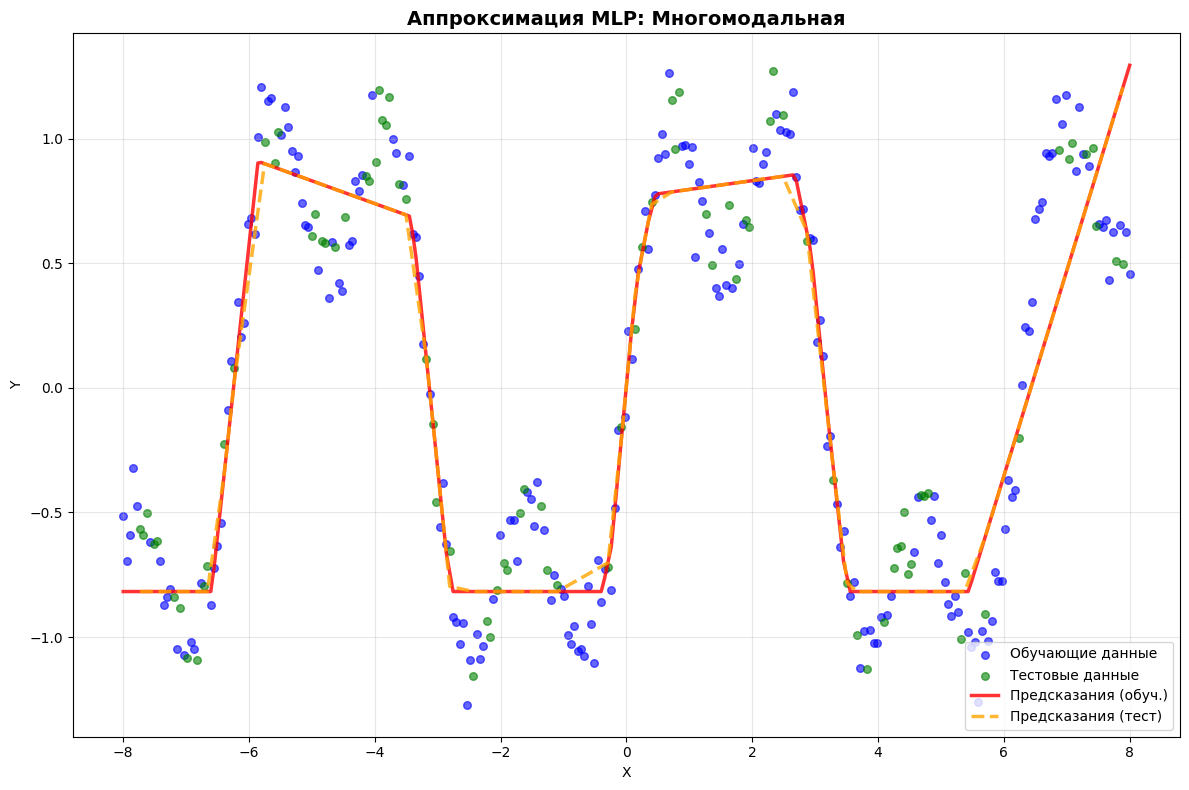

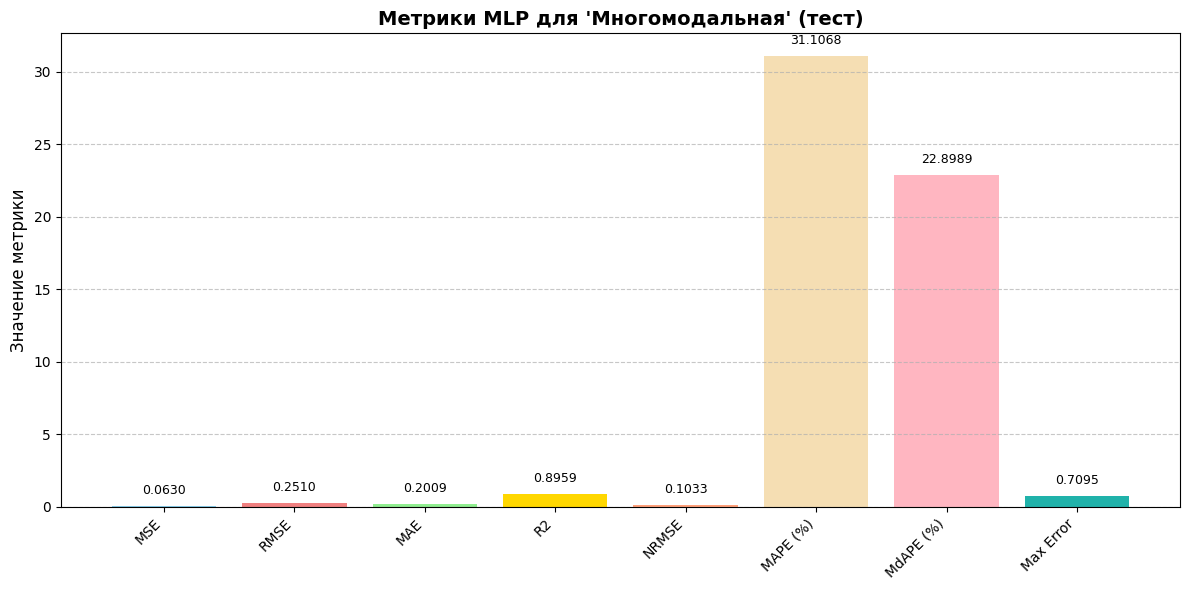


Обучение на функции: Разрывная
  ✓ Результаты для 'Разрывная':
    - MSE: 0.0464
    - RMSE: 0.2154
    - MAE: 0.1526
    - R2: 0.9529
    - NRMSE: 0.0722
    - MAPE (%): 22.4843
    - MdAPE (%): 12.8773
    - Max Error: 1.1543


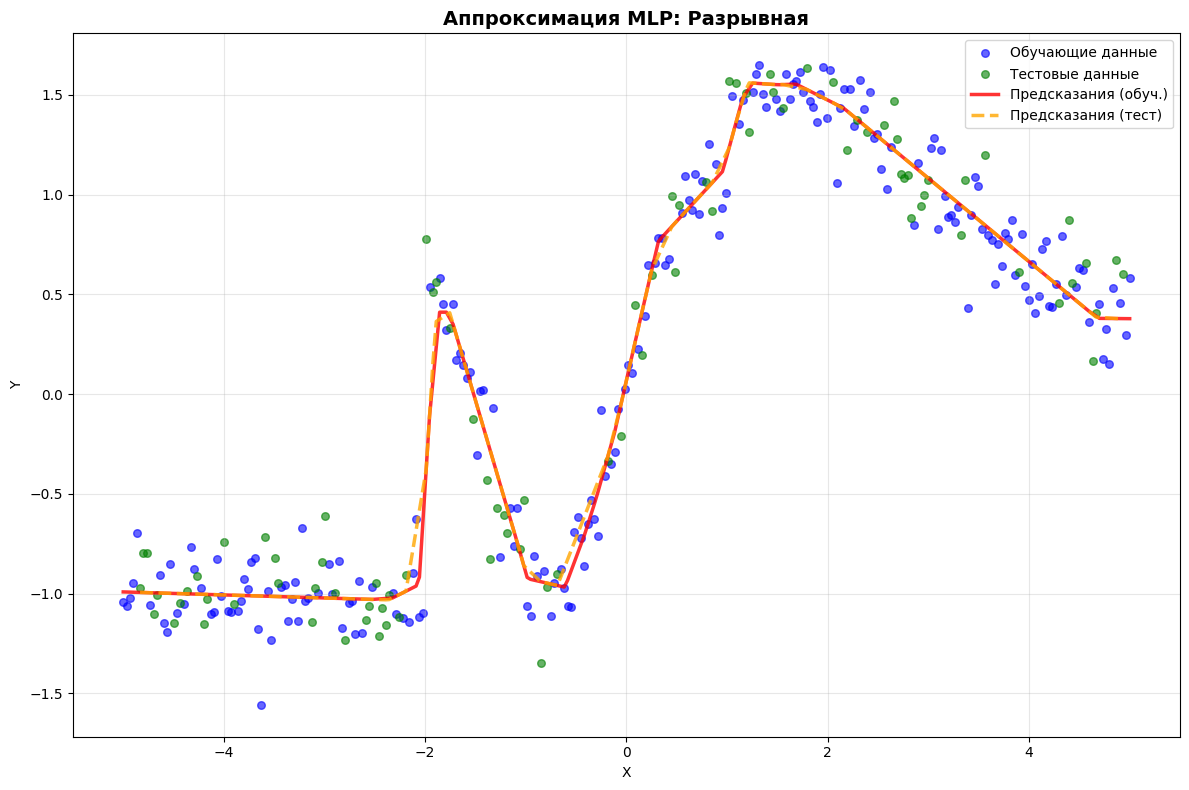

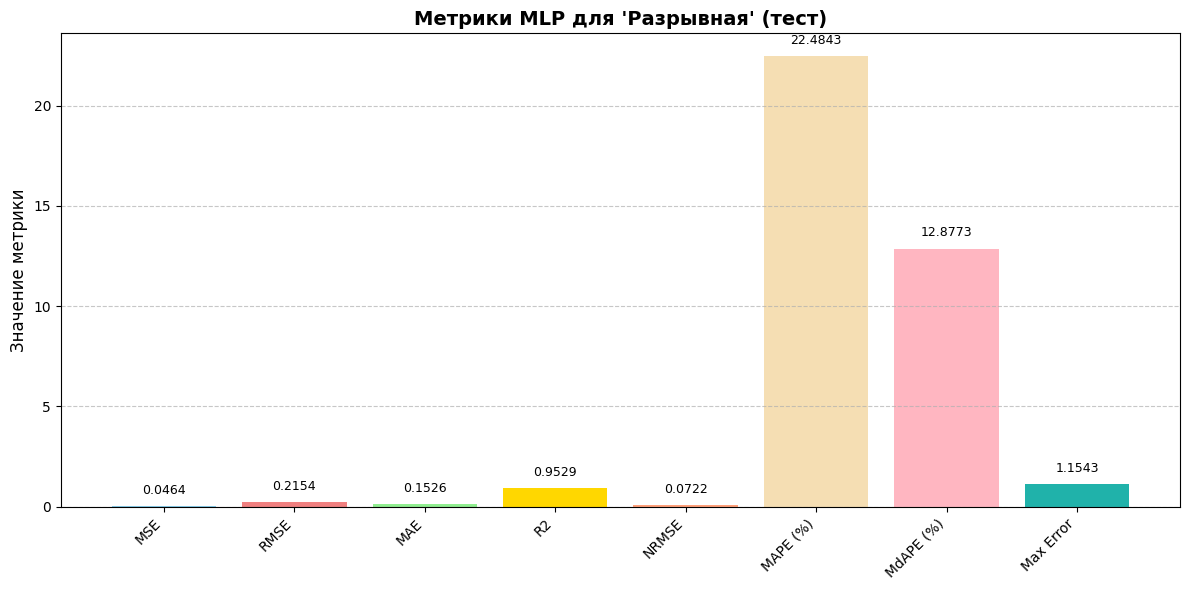


Обучение на функции: С шумными всплесками
  ✓ Результаты для 'С шумными всплесками':
    - MSE: 0.1930
    - RMSE: 0.4393
    - MAE: 0.3251
    - R2: 0.6034
    - NRMSE: 0.1423
    - MAPE (%): 121.2045
    - MdAPE (%): 73.6861
    - Max Error: 1.1876


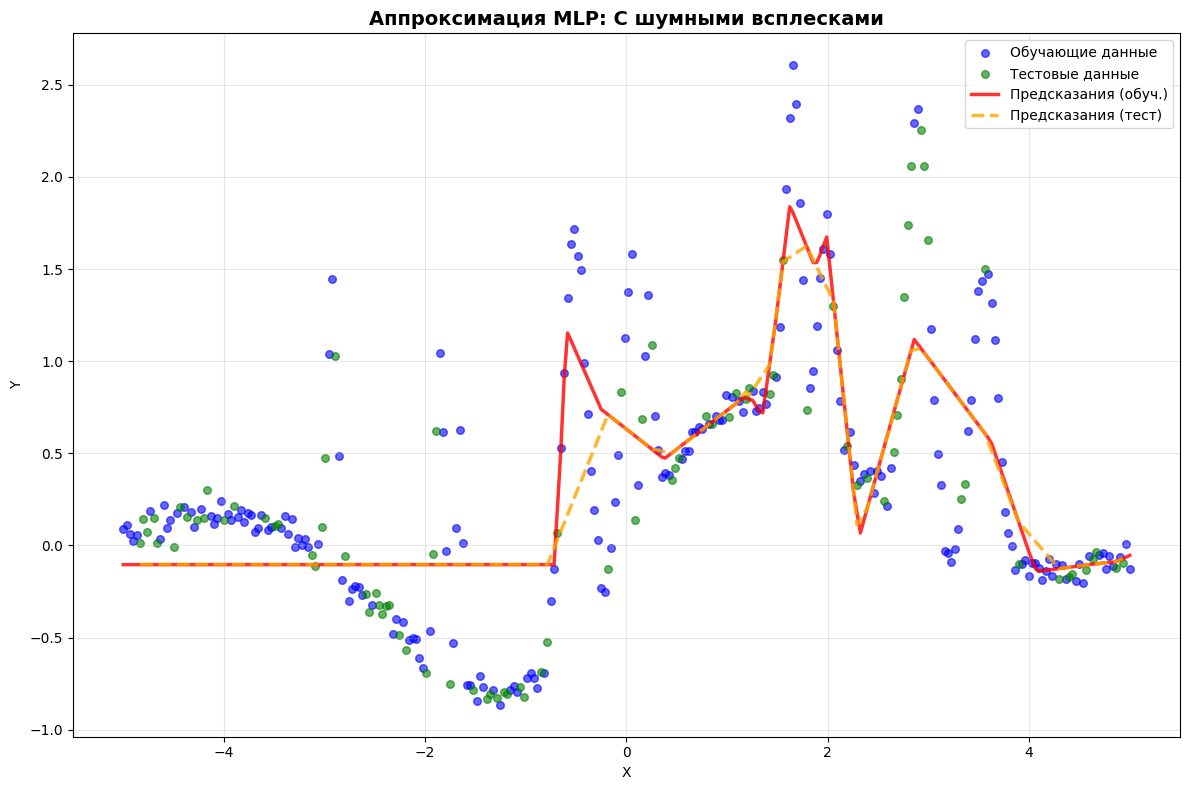

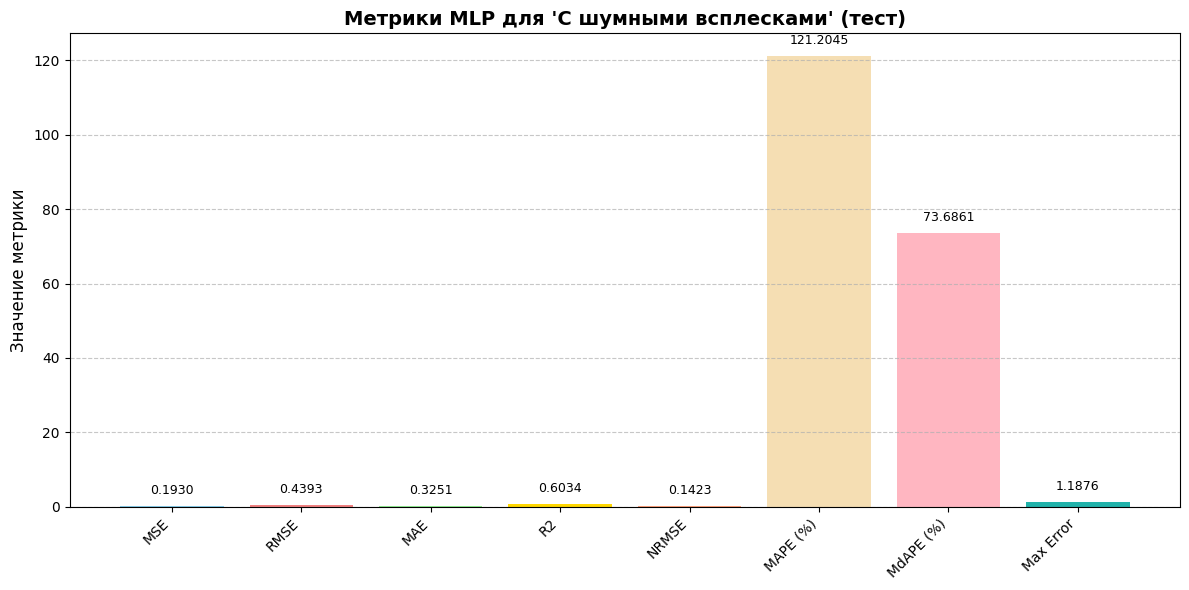


ОБЩИЙ АНАЛИЗ РЕЗУЛЬТАТОВ НА СЛОЖНЫХ ФУНКЦИЯХ:
  Функция 'Многомодальная': MSE = 0.0630, R2 = 0.8959
  Функция 'Разрывная': MSE = 0.0464, R2 = 0.9529
  Функция 'С шумными всплесками': MSE = 0.1930, R2 = 0.6034

ВЫВОДЫ:
  - MLP демонстрирует гибкость в аппроксимации различных типов сложных функций.
  - Для функций с разрывами или резкими пиками может потребоваться более сложная архитектура или специальная обработка данных.
  - ReLU активация и адекватное количество эпох помогают в обучении на таких данных.


In [23]:
def main():
    """
    Главная функция для запуска демонстраций MLP.
    """
    print("==== ДЕМОНСТРАЦИИ МНОГОСЛОЙНЫХ ПЕРСЕПТРОНОВ (MLP) ====")

    print("\nВыберите демонстрацию:")
    print("1. Аппроксимация 1D функции MLP (Регрессия)")
    print("2. 2D Классификация MLP (задача 'лун')")
    print("3. Интерактивный процесс обучения MLP (1D Регрессия)")
    print("4. Влияние архитектуры MLP (число слоев и нейронов)")
    print("5. Сравнение функций активации в MLP")
    print("6. MLP на сложных 1D функциях (Продвинутые эксперименты)")


    try:
        choice = int(input("\nВведите номер демонстрации (1–6): "))

        match choice:
            case 1:
                demo_mlp_approximation_1d()
            case 2:
                demo_mlp_classification_2d()
            case 3:
                demo_mlp_training_process_interactive()
            case 4:
                demo_mlp_architecture_impact()
            case 5:
                demo_activation_function_comparison()
            case 6:
                demo_mlp_advanced_experiments()
            case _:
                print("Некорректный выбор. Запустите снова и выберите число от 1 до 6.")
    except ValueError:
        print("Некорректный ввод. Пожалуйста, введите число.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


if __name__ == "__main__":
    main()